# Problem Statement
#### This Data set consists of some features which determine the possible price / rent amount of houses in Mumbai. This is a Real world Real Estate dataset.

## Objective:

#### To perform Feature Engineering and Exploratory data analysis and cleaning on Mumbai's Real Estate Rental price data availed from Kaggle.com and to build an ANN that woukd use deep learning to build a price predictor (Rent Amount) model based on several parameters.

# Solution:

#### We first import the pandas library to import and load the data file and perform some basic analysis on it.

In [2]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('prop_data_clean.csv')

In [4]:
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,id_string,latitude,locality,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
0,350.0,2.0,1,Mumbai,"2 Bath,Unfurnished,East facing The project has...",NaN,NaN,NaN,Unfurnished,45349857,domcache_srp_45349857,19.201336,Malad West,72.825882,2020-01-11,Saurabh Patil,9000,NaN,1 BHK Apartment for Rent in Malad West,Rent,Apartment,/propertyDetails/1-BHK-350-Sq-ft-Multistorey-A...,Agent
1,652.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing A 1BHK apart...",Veena Group,NaN,NaN,Semi-Furnished,45960973,domcache_srp_45960973,19.410704,Vasai,72.833592,2020-01-11,Gorakh Chavan,8060,Veena Dynasty,"1 BHK Apartment for Rent in Veena Dynasty, Vasai",Rent,Apartment,/propertyDetails/1-BHK-652-Sq-ft-Multistorey-A...,Agent
2,635.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,4 floor,West facing A be...",Agarwal Group,7.0,4.0,Semi-Furnished,46688849,domcache_srp_46688849,19.467032,Virar,72.801612,2019-12-13,Lokesh Joshi,8000,Agarwal Lifestyle,"1 BHK Apartment for Rent in Agarwal Lifestyle,...",Rent,Apartment,/propertyDetails/1-BHK-635-Sq-ft-Multistorey-A...,Agent
3,540.0,2.0,1,Mumbai,"2 Bath,Semi-Furnished,East facing Essential Se...",NaN,NaN,NaN,Semi-Furnished,44696119,domcache_srp_44696119,19.407257,Vasai East,72.836006,2020-01-13,Sajith Thomas,8000,NaN,1 BHK Apartment for Rent in Vasai East,Rent,Apartment,/propertyDetails/1-BHK-540-Sq-ft-Multistorey-A...,Agent
4,625.0,1.0,1,Mumbai,"1 Bath,Furnished,2 floor,North facing 24 hours...",Millennium Group,7.0,2.0,Furnished,46742851,domcache_srp_46742851,19.360215,Naigaon East,72.850167,2019-12-17,Charmaine Gomez,9000,Mittal Enclave,"1 BHK Apartment for Rent in Mittal Enclave, Na...",Rent,Apartment,/propertyDetails/1-BHK-625-Sq-ft-Multistorey-A...,Owner


#### It is observed that there are several data features like ID, Descirpition, city et which are text features and are not really significant in our predictor model building process as they need not necessarily impact the price predicton. Thus, we choose to drop such data and proceed.

In [5]:
df2 = df.drop(df[['id', 'desc','city','trans', 'dev_name', 'id_string', 'latitude', 'longitude', 'post_date', 'user_type', 'poster_name', 'project', 'title', 'url']], axis = 1)
df2.head()

,area,bathroom_num,bedroom_num,floor_count,floor_num,furnishing,locality,price,type
0,350.0,2.0,1,NaN,NaN,Unfurnished,Malad West,9000,Apartment
1,652.0,2.0,1,NaN,NaN,Semi-Furnished,Vasai,8060,Apartment
2,635.0,2.0,1,7.0,4.0,Semi-Furnished,Virar,8000,Apartment
3,540.0,2.0,1,NaN,NaN,Semi-Furnished,Vasai East,8000,Apartment
4,625.0,1.0,1,7.0,2.0,Furnished,Naigaon East,9000,Apartment


In [6]:
df2.describe()

,area,bathroom_num,bedroom_num,floor_count,floor_num,price
count,33572.000000,34334.000000,34348.000000,31488.000000,31567.000000,3.434800e+04
mean,1177.387704,2.199278,2.076686,17.403551,8.577850,7.149190e+04
std,682.924385,0.880150,0.899821,13.996063,7.770904,7.717099e+04
min,10.000000,1.000000,1.000000,2.000000,-2.000000,2.200000e+03
25%,690.000000,2.000000,1.000000,7.000000,3.000000,3.200000e+04
50%,1040.000000,2.000000,2.000000,14.000000,6.000000,5.000000e+04
75%,1400.000000,3.000000,3.000000,22.000000,11.000000,8.000000e+04
max,9500.000000,8.000000,5.000000,120.000000,95.000000,1.200000e+06


#### Features like statte of furnishing and type type of the house are categorical data and thus, we can assign numbers to them using OneHotEncoding, as shown below, and form a new DataFrame.

In [7]:
furn_state = pd.get_dummies(df2.furnishing)
furn_state

,Furnished,Semi-Furnished,Unfurnished
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
34343,0,1,0
34344,0,1,0
34345,0,1,0
34346,0,1,0


In [8]:
type_state = pd.get_dummies(df2.type)
type_state

,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Service Apartment
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
34343,1,0,0,0,0,0
34344,1,0,0,0,0,0
34345,1,0,0,0,0,0
34346,1,0,0,0,0,0


#### We can now concatenate this new data frame with the original one.

In [9]:
df3 = pd.concat([df2, type_state, furn_state], axis = 1)

In [10]:
df3.head()

,area,bathroom_num,bedroom_num,floor_count,floor_num,furnishing,locality,price,type,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Service Apartment,Furnished,Semi-Furnished,Unfurnished
0,350.0,2.0,1,NaN,NaN,Unfurnished,Malad West,9000,Apartment,1,0,0,0,0,0,0,0,1
1,652.0,2.0,1,NaN,NaN,Semi-Furnished,Vasai,8060,Apartment,1,0,0,0,0,0,0,1,0
2,635.0,2.0,1,7.0,4.0,Semi-Furnished,Virar,8000,Apartment,1,0,0,0,0,0,0,1,0
3,540.0,2.0,1,NaN,NaN,Semi-Furnished,Vasai East,8000,Apartment,1,0,0,0,0,0,0,1,0
4,625.0,1.0,1,7.0,2.0,Furnished,Naigaon East,9000,Apartment,1,0,0,0,0,0,1,0,0


#### When one variable can be derived from another variable, this is known as multi-variable colinearity which can oten lead to an error condition known as the dummy variable trap. Thus we drop one such variable (for each category discussed above) and proceed with the features.

In [11]:
df4 = df3.drop(df3[['Unfurnished', 'Service Apartment', 'furnishing', 'type']], axis = 1)

In [12]:
df4.head()

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished
0,350.0,2.0,1,NaN,NaN,Malad West,9000,1,0,0,0,0,0,0
1,652.0,2.0,1,NaN,NaN,Vasai,8060,1,0,0,0,0,0,1
2,635.0,2.0,1,7.0,4.0,Virar,8000,1,0,0,0,0,0,1
3,540.0,2.0,1,NaN,NaN,Vasai East,8000,1,0,0,0,0,0,1
4,625.0,1.0,1,7.0,2.0,Naigaon East,9000,1,0,0,0,0,1,0


In [13]:
df4.count(axis = 0)

area                       33572
bathroom_num               34334
bedroom_num                34348
floor_count                31488
floor_num                  31567
locality                   34140
price                      34348
Apartment                  34348
Builder Floor Apartment    34348
Multistorey Apartment      34348
Penthouse                  34348
Residential House          34348
Furnished                  34348
Semi-Furnished             34348
dtype: int64

#### We will now handle the missing or NaN values and that can be done by filling the NaN values of the corresponding feature with is's median. This can be computed using the statistics library.

In [14]:
import statistics

In [15]:
statistics.median(df4['floor_count'])

16.0

In [16]:
statistics.median(df4['floor_num'])

5.0

In [17]:
statistics.median(df4['bathroom_num'])

2.0

In [18]:
statistics.median(df4['area'])

800.0

In [19]:
df4[['floor_count']] = df4[['floor_count']].fillna(statistics.median(df4['floor_count']) / 2)

We divide the floor_count median by 2 as not every building has 16 floors, thus we can an average of the median and proceed.

In [20]:
df4[['floor_num']] = df4[['floor_num']].fillna(statistics.median(df4['floor_num']))

In [21]:
df4[['bathroom_num']] = df4[['bathroom_num']].fillna(statistics.median(df4['bathroom_num']))

In [22]:
df4[['area']] = df4[['area']].fillna(statistics.median(df4['area']))

In [23]:
df4.head()

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished
0,350.0,2.0,1,8.0,5.0,Malad West,9000,1,0,0,0,0,0,0
1,652.0,2.0,1,8.0,5.0,Vasai,8060,1,0,0,0,0,0,1
2,635.0,2.0,1,7.0,4.0,Virar,8000,1,0,0,0,0,0,1
3,540.0,2.0,1,8.0,5.0,Vasai East,8000,1,0,0,0,0,0,1
4,625.0,1.0,1,7.0,2.0,Naigaon East,9000,1,0,0,0,0,1,0


In [24]:
df4.count(axis = 0)

area                       34348
bathroom_num               34348
bedroom_num                34348
floor_count                34348
floor_num                  34348
locality                   34140
price                      34348
Apartment                  34348
Builder Floor Apartment    34348
Multistorey Apartment      34348
Penthouse                  34348
Residential House          34348
Furnished                  34348
Semi-Furnished             34348
dtype: int64

#### After the above task, we see we have some NaN values for locality and those are nearly 200 in number. Thus we can safely do away woth these NaN value containing rows.

In [25]:
df5 = df4.dropna(axis = 0)

In [26]:
df5.count()

area                       34140
bathroom_num               34140
bedroom_num                34140
floor_count                34140
floor_num                  34140
locality                   34140
price                      34140
Apartment                  34140
Builder Floor Apartment    34140
Multistorey Apartment      34140
Penthouse                  34140
Residential House          34140
Furnished                  34140
Semi-Furnished             34140
dtype: int64

#### We now work with the Localities that are available in the dataset. They can also be turned to dummy variables but there are a lot of such unique localities available. thus, we put a threshold of 500, i.e., we only enlist localities which have AT LEAST 500 entries. Rest all are categorised, generally as OTHERS. This new data frame is then appended to the original data frame.

In [27]:
df5.locality.unique()

array(['Malad West', 'Vasai', 'Virar', 'Vasai East', 'Naigaon East',
       'Virar West', 'Royal Palms Estate', 'Nalasopara', 'Silver Park',
       'Vasai West', 'Andheri East', 'Mulund East', 'Malvani',
       'Nalasopara East', 'Balkum Pada - Majiwada', 'Kalyan',
       'Bhayandar East', 'Mira Bhayandar', 'MHADA Colony', 'Chembur Camp',
       'Govind Nagar', 'Bhayandar West', 'Beverly Park', 'Worli',
       'Nalasopara West', 'Lok Manya Nagar', 'Borivali West',
       'Viva College Road', 'Mira Road', 'New Link Road',
       'Bhandup Industrial Estate', 'Sakinaka', 'Dongri', 'MMRDA Area',
       'Yashavant Nagar', 'Kandivali East', 'Ghatkopar West',
       'Ghodbunder', 'Nahur West', 'CAMA Industrial Estate',
       'Anushakti Colony', 'Thane', 'Yari Road', 'Virar East',
       'Goregaon East', 'Sakinaka Junction', 'Prabhadevi', 'Andheri West',
       'Pandurang Wadi', 'Bandra West', 'Khar West', 'Bolinj',
       'Virat Nagar', 'Thane-Kalyan-Dombivli', 'Poonam Gardens',
       'Ramd

In [28]:
len(df5.locality.unique())

827

In [29]:
pd.pandas.set_option('display.max_rows',None)

locality_num = df5.groupby('locality')['locality'].agg('count').sort_values(ascending = False)
locality_num


locality
Powai                                        1484
Chembur                                      1422
Andheri West                                 1419
Andheri East                                 1115
Worli                                        1043
Mulund West                                   992
Bandra West                                   984
Bhandup West                                  917
Thakur Village, Kandivali East                768
Goregaon East                                 755
Parel                                         655
Malad West                                    537
Chandivali                                    537
Mira Road                                     530
Khar West                                     511
Prabhadevi                                    511
Thakur Complex                                481
Lower Parel                                   428
Ghatkopar West                                415
Lokhandwala Complex                      

In [30]:
locality_others = locality_num[locality_num<500]

In [31]:
len(df5.locality.unique())

827

In [32]:
df5.locality = df5.locality.apply(lambda x: 'others' if x in locality_others else x)

C:\Users\Swastika Sagnik\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
len(df5.locality.unique())

17

In [34]:
df5.head(10)

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished
0,350.0,2.0,1,8.0,5.0,Malad West,9000,1,0,0,0,0,0,0
1,652.0,2.0,1,8.0,5.0,others,8060,1,0,0,0,0,0,1
2,635.0,2.0,1,7.0,4.0,others,8000,1,0,0,0,0,0,1
3,540.0,2.0,1,8.0,5.0,others,8000,1,0,0,0,0,0,1
4,625.0,1.0,1,7.0,2.0,others,9000,1,0,0,0,0,1,0
5,630.0,2.0,1,15.0,9.0,others,8000,1,0,0,0,0,0,0
6,690.0,2.0,1,7.0,4.0,others,8500,1,0,0,0,0,1,0
7,338.0,1.0,1,5.0,2.0,others,10000,1,0,0,0,0,0,0
8,675.0,2.0,1,12.0,11.0,others,9000,1,0,0,0,0,1,0
9,500.0,1.0,1,6.0,2.0,others,8000,1,0,0,0,0,0,1


#### There are some data points which show abrupt behavior or anomaly in values of area / bedroom number. Thus, we can use some information from the real estate field and confirm that the area/bedroom numbers should ideally be more than 200 sq.ft per bedroom. Thus, we remove such outliers or invalid data points from our parent data and proceed.

In [35]:
df5[df5.area/df5.bedroom_num<200].head()

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished
43,160.0,1.0,1,3.0,3.0,Worli,9000,0,1,0,0,0,0,0
74,130.0,1.0,1,6.0,6.0,others,10000,1,0,0,0,0,0,0
81,170.0,1.0,1,8.0,5.0,others,8000,0,1,0,0,0,0,0
154,90.0,3.0,3,3.0,0.0,others,21000,0,0,0,0,1,0,1
393,180.0,1.0,1,4.0,0.0,Malad West,12000,1,0,0,0,0,0,1


In [36]:
df5.shape

(34140, 14)

In [37]:
df6 = df5[~(df5.area/df5.bedroom_num<200)]
df6.shape

(34100, 14)

#### One more general Real Estate theory states that the number of bathrooms in a house can generally, at the most, be one more than the number of bedrooms in the house. Thus, we accordingly edit our data frame and proceed.

In [38]:
df6[df6.bathroom_num>(df6.bedroom_num + 1 )]

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished
270,3050.0,6.0,4,37.0,20.0,Mulund West,75000,1,0,0,0,0,0,1
278,3150.0,6.0,4,8.0,5.0,Mulund West,75000,1,0,0,0,0,0,1
280,3150.0,6.0,4,38.0,17.0,Mulund West,75000,1,0,0,0,0,0,1
283,3150.0,6.0,4,36.0,25.0,Mulund West,75000,1,0,0,0,0,0,1
530,2950.0,6.0,4,8.0,5.0,Mulund West,80000,1,0,0,0,0,0,1
534,3010.0,6.0,4,8.0,5.0,Mulund West,81000,1,0,0,0,0,0,0
551,2600.0,6.0,4,54.0,35.0,others,100000,1,0,0,0,0,0,0
574,2500.0,6.0,4,58.0,16.0,others,90000,1,0,0,0,0,0,1
590,3200.0,6.0,4,45.0,26.0,others,100000,1,0,0,0,0,0,1
622,2850.0,6.0,4,8.0,5.0,Mulund West,80000,1,0,0,0,0,0,1


In [39]:
len(df6[df6.bathroom_num>(df6.bedroom_num + 1 )])

187

In [40]:
df7 = df6[~(df6.bathroom_num>(df6.bedroom_num + 1 ))]
df7.shape

(33913, 14)

In [41]:
df7.head()

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished
0,350.0,2.0,1,8.0,5.0,Malad West,9000,1,0,0,0,0,0,0
1,652.0,2.0,1,8.0,5.0,others,8060,1,0,0,0,0,0,1
2,635.0,2.0,1,7.0,4.0,others,8000,1,0,0,0,0,0,1
3,540.0,2.0,1,8.0,5.0,others,8000,1,0,0,0,0,0,1
4,625.0,1.0,1,7.0,2.0,others,9000,1,0,0,0,0,1,0


#### Once the localities have been concised, we can now get their dummy variables and store it in another data frame and then concatenate it with the parent data frame. After that, we'll again dropn the OTHERS feature to avoid Dummy traps.

In [42]:
loc_dummies = pd.get_dummies(df7.locality)

In [43]:
df8 = pd.concat([df7, loc_dummies], axis = 1)

In [44]:
df8.head(3)

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished,Andheri East,Andheri West,Bandra West,Bhandup West,Chandivali,Chembur,Goregaon East,Khar West,Malad West,Mira Road,Mulund West,Parel,Powai,Prabhadevi,"Thakur Village, Kandivali East",Worli,others
0,350.0,2.0,1,8.0,5.0,Malad West,9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,652.0,2.0,1,8.0,5.0,others,8060,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,635.0,2.0,1,7.0,4.0,others,8000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
df9 = df8.drop(df8[['others']], axis = 1)
df9.head(3)

,area,bathroom_num,bedroom_num,floor_count,floor_num,locality,price,Apartment,Builder Floor Apartment,Multistorey Apartment,Penthouse,Residential House,Furnished,Semi-Furnished,Andheri East,Andheri West,Bandra West,Bhandup West,Chandivali,Chembur,Goregaon East,Khar West,Malad West,Mira Road,Mulund West,Parel,Powai,Prabhadevi,"Thakur Village, Kandivali East",Worli
0,350.0,2.0,1,8.0,5.0,Malad West,9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,652.0,2.0,1,8.0,5.0,others,8060,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,635.0,2.0,1,7.0,4.0,others,8000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df9.shape

(33913, 30)

## Data Visualization

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

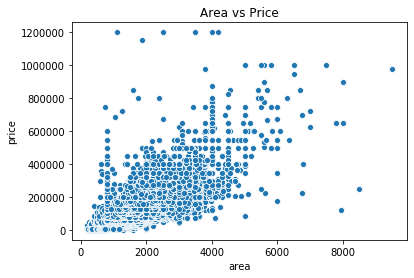

In [48]:
%matplotlib inline

ax = sns.scatterplot(df9.area, df9.price)
ax.set(xlabel = "area", ylabel = "price")
plt.title('Area vs Price')

plt.show()

#### There is an obvious linear relationship between the area of the house and it's rent.

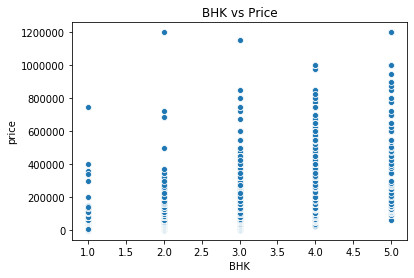

In [49]:
%matplotlib inline

ax = sns.scatterplot(df9.bedroom_num, df9.price)
ax.set(xlabel = "BHK", ylabel = "price")
plt.title('BHK vs Price')

plt.show()

#### There is an exponential rise in the price of the houses with greater number of bedrooms which is imminent.

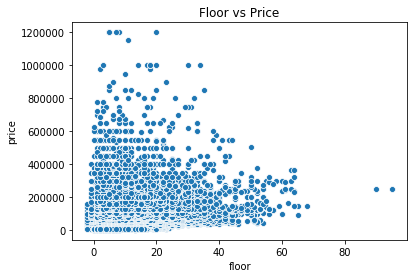

In [50]:
%matplotlib inline

ax = sns.scatterplot(df9.floor_num, df9.price)
ax.set(xlabel = "floor", ylabel = "price")
plt.title('Floor vs Price')

plt.show()

#### There is an exponential fall in price of the house with greater floor number. Thus, houses at higher storeys are less expensive. 

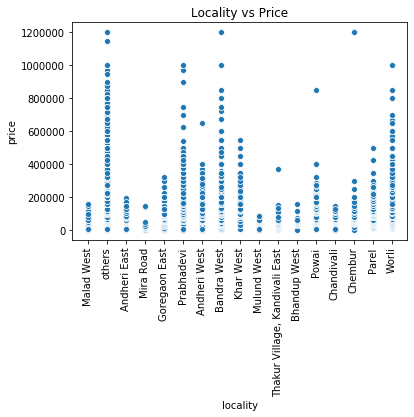

In [51]:
%matplotlib inline

ax = sns.scatterplot(df9.locality, df9.price)
ax.set(xlabel = "locality", ylabel = "price")
plt.title('Locality vs Price')
plt.xticks(rotation = 90)
plt.show()

#### A generic representation of the data shows that locality wise prices are greatly variable. Places like Andheri West and Bandra West are the most expensive localities in terms of real estate.

#### We now define our input (X: Independant) and target (Y: Depenedant) vectors / variables.

In [52]:
inputs = df9.drop(df9[['locality', 'price']], axis = 1)
inputs.shape

(33913, 28)

In [53]:
target = df9['price']
target.shape

(33913,)

In [54]:
inputs.to_csv('inputs.csv', index=False)
target.to_csv('target.csv', index= False)

C:\Users\Swastika Sagnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [55]:
df_corr=pd.concat([inputs,target], axis=1)
df_corr.shape

(33913, 29)

In [56]:
df_corr.to_csv('df.csv', index = False)

#### We now split our data into train (80%) and test (20%) data.

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

#### We now train our ANN with one layer and other optimizations as shown below and then check the performance and also evaluate and predict some values.

In [63]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train.to_numpy(dtype = 'float32'), y_train.to_numpy(dtype = 'float32'), epochs=5)


Train on 27130 samples
Epoch 1/5
27130/27130 [==============================] - 3s 97us/sample - loss: 62430522.6353 - accuracy: 0.7064
Epoch 2/5
27130/27130 [==============================] - 2s 75us/sample - loss: 62147032.1970 - accuracy: 0.9964
Epoch 3/5
27130/27130 [==============================] - 2s 77us/sample - loss: 62147032.0198 - accuracy: 0.9983
Epoch 4/5
27130/27130 [==============================] - 2s 79us/sample - loss: 62147032.1460 - accuracy: 0.9990
Epoch 5/5
27130/27130 [==============================] - 2s 83us/sample - loss: 62147032.2524 - accuracy: 0.9993


In [64]:
model.evaluate(X_test.to_numpy(dtype = 'float32'), y_test.to_numpy(dtype = 'float32'))

6783/6783 [==============================] - 1s 78us/sample - loss: 63663438.2845 - accuracy: 0.9996


[63663438.284534864, 0.99955773]

In [65]:
model.predict(X_test.to_numpy(dtype = 'float32'))

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.]], dtype=float32)

In [66]:
y_test.to_numpy(dtype = 'float32')

array([ 36000.,  62000.,  65000., ..., 230000., 400000.,  47000.],
      dtype=float32)

# Result: Thus, we have succesfully carried out EDA and FeatureEngineering on the given data and build an ANN model that can succesfully predict the output with respect to the given inputs, with a 99.5% accuracy.